### CONNECTTEL CUSTOMER CHURN PREDICTION

ConnectTel, a leading telecommunications company, is facing a critical challenge related to customer churn. Customer churn, or the rate at which customers cancel their telecom services, has been increasing in an alarming rate, posing a significant threat to ConnectTel's business sustainability and growth. The company's current customer retention strategies lack precision and effectiveness, resulting in the loss of valuable customers to competitors. The problem is exacerbated by the highly dynamic and competitive nature of the telecom industry.
By leveraging advanced analytics and machine learning techniques on the available customer data, ConnectTel seeks to accurately forecast customer churn. The company will benefit from this solution by gaining the ability to predict which customers are at risk of churning with a high degree of accuracy.
Once the churn prediction model is in place, ConnectTel can implement targeted retention initiatives. Instead of employing a one-size-fits-all approach, the company can tailor its efforts to specific customer segments based on their likelihood of churning. This personalized approach will lead to more effective and cost-efficient retention strategies.
ConnectTel's primary benefit from this data mining solution is the reduction of customer attrition. By proactively identifying and addressing the factors driving churn, the company can minimize the loss of subscribers and retain a larger portion of its customer base. This directly translates into increased revenue and improved profitability.
By addressing customer concerns and preferences identified through data mining, ConnectTel can enhance customer loyalty. Satisfied and loyal customers are more likely to remain with the company, resulting in long-term relationships and recurring revenue.
In the highly competitive telecommunications industry, retaining customers is essential for maintaining a competitive edge. A successful data mining solution will enable ConnectTel to differentiate itself by offering superior customer service and tailored solutions.
The data mining solution promotes a data-driven culture within ConnectTel. It empowers decision-makers with actionable insights, enabling them to make informed choices regarding customer retention strategies, pricing, and service enhancements.
ConnectTel's long-term growth prospects depend on its ability to reduce churn and maintain a stable customer base. This solution equips the company with the tools needed to sustain growth and expand its market presence.
ConnectTel will benefit significantly from the data mining solution by addressing the pressing issue of customer churn. The company can ensure business sustainability and remain competitive in the ever-evolving telecommunications landscape through accurate prediction, targeted retention efforts, and enhanced customer loyalty. 
So, this notebook shows the exploratory data analysis to determining the major factors driving the customer churn and a ML model to help predict future customer churn.

### Importing Libraries and Dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np

#Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the dataset file
df = pd.read_csv('Customer-Churn.csv')

### Exploring the dataset structure

In [3]:
#View available columns
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#view statiscal description
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Data cleaning

In [6]:
#check for missing/null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#drop null values/missing data
df.dropna(axis=0, inplace=True)

In [8]:
#check if null values have been dropped
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#converting TotalCharges from object to float data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
#check if the datatype conversion was succesful
df['TotalCharges'].dtypes

dtype('float64')

In [11]:
#verify that there is no null value
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [12]:
#verify that no null data is left
nan_indices = df[df['TotalCharges'].isna()]

# Display rows where column 'A' has NaN values
print(nan_indices)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [13]:
#dropping the observed null values in TotalCharges column
df.dropna(inplace=True)

In [14]:
#confirm that the null values in TotalCharges have been dropped
df['TotalCharges'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7032, dtype: bool

In [15]:
#check for duplicates
df.duplicated().any()

False

In [16]:
# Count the total number of NaN values in the d#ataFrame
total_nan_count = nan_df.sum().sum()

print("NaN values in each column:")
print(nan_count)

print("\nTotal NaN values in the DataFrame:", total_nan_count)

NameError: name 'nan_df' is not defined

In [17]:
#ensuring that no null values are present
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Verify that no unique values are present in the columns-

In [18]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [20]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [21]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [22]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [23]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

In [26]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [27]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [28]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [29]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [30]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [31]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [32]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [33]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [34]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [35]:
df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [36]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

### Exploratory Data Analysis

Univariate plot for a selected variables

Text(0, 0.5, '')

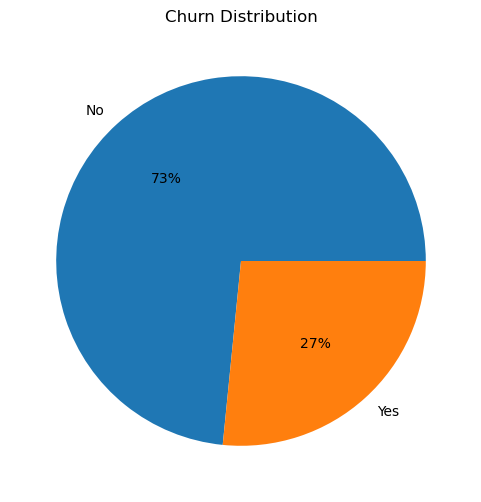

In [37]:
#Churn distribution of the data
df.Churn.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(6, 6))
plt.title('Churn Distribution')
plt.ylabel('')

Text(0, 0.5, 'Count')

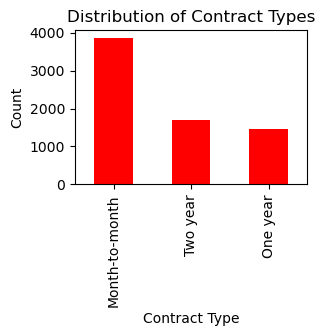

In [38]:
#Contract type distribution
df['Contract'].value_counts().plot(kind='bar',figsize=(3, 2), color = 'Red')
plt.title('Distribution of Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

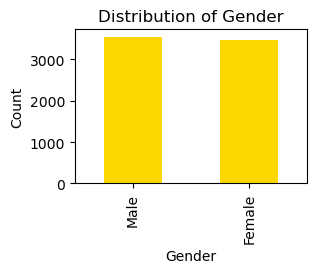

In [39]:
#Gender distribution of the dataset
df['gender'].value_counts().plot(kind='bar',figsize=(3, 2), color = 'gold')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

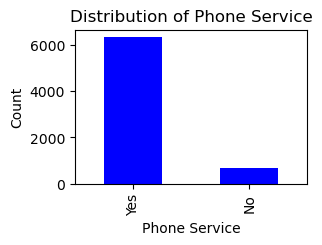

In [40]:
#Phone service distribution
df['PhoneService'].value_counts().plot(kind='bar',figsize=(3, 2), color = 'blue')
plt.title('Distribution of Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Count')

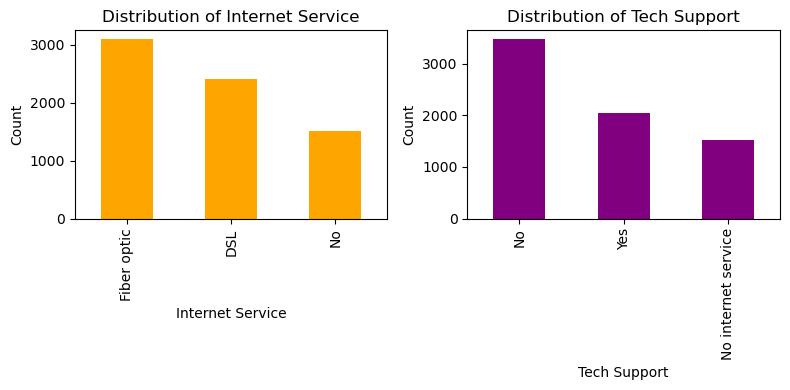

In [41]:
#Distribution of Internet service and Tech support of the dataset

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot the first bar chart on the first subplot (axs[0])
df['InternetService'].value_counts().plot(kind='bar', color='orange', ax=axs[0])
axs[0].set_title('Distribution of Internet Service')
axs[0].set_xlabel('Internet Service')
axs[0].set_ylabel('Count')

# Plot the second bar chart on the second subplot (axs[1])
df['TechSupport'].value_counts().plot(kind='bar', color='purple', ax=axs[1])
axs[1].set_title('Distribution of Tech Support')
axs[1].set_xlabel('Tech Support')
axs[1].set_ylabel('Count')

# Adjust layout and display the plots
plt.tight_layout()

plt.show()

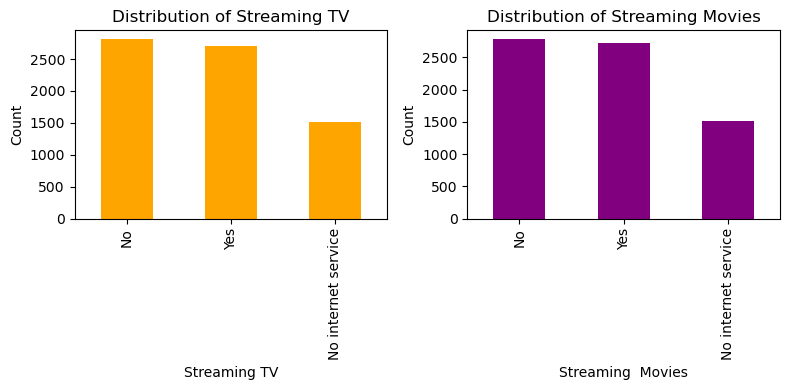

In [42]:
#Distribution of Streaming TV and Movies of the dataset

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot the first bar chart on the first subplot (axs[0])
df['StreamingTV'].value_counts().plot(kind='bar', color='orange', ax=axs[0])
axs[0].set_title('Distribution of Streaming TV')
axs[0].set_xlabel('Streaming TV')
axs[0].set_ylabel('Count')

# Plot the second bar chart on the second subplot (axs[1])
df['StreamingMovies'].value_counts().plot(kind='bar', color='purple', ax=axs[1])
axs[1].set_title('Distribution of Streaming Movies')
axs[1].set_xlabel('Streaming  Movies')
axs[1].set_ylabel('Count')

plt.tight_layout()

plt.show()

Bivariate

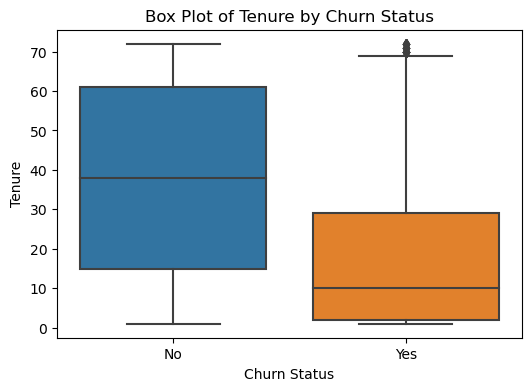

In [43]:
#effect of Customer tenure on churn

plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Box Plot of Tenure by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Tenure')
plt.show()

In [44]:
# Analyze for outliers
column_name = 'tenure'  # Change this to the column you're interested in

# Calculate the IQR for the specified column
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in the column
outliers_count = len(df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)])

# Print the number of outliers
print(f"Number of outliers in '{column_name}': {outliers_count}")


Number of outliers in 'tenure': 0


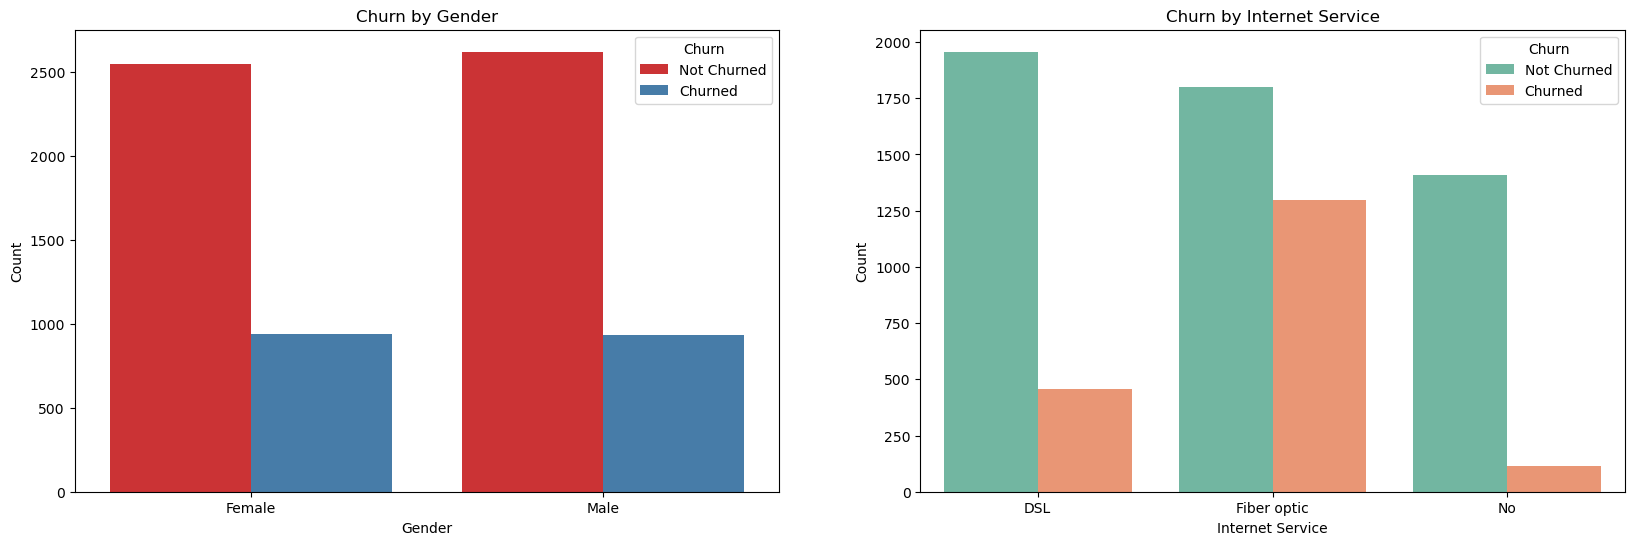

In [45]:
#Churn status of Gender and Internet service

# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

sns.countplot(data=df, x='gender', hue='Churn', palette='Set1', ax=axs[0])
axs[0].set_title('Churn by Gender')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Count')
axs[0].legend(title='Churn', labels=['Not Churned', 'Churned'])

sns.countplot(data=df, x='InternetService', hue='Churn', palette='Set2', ax=axs[1])
axs[1].set_title('Churn by Internet Service')
axs[1].set_xlabel('Internet Service')
axs[1].set_ylabel('Count')
axs[1].legend(title='Churn', labels=['Not Churned', 'Churned'])

plt.show()

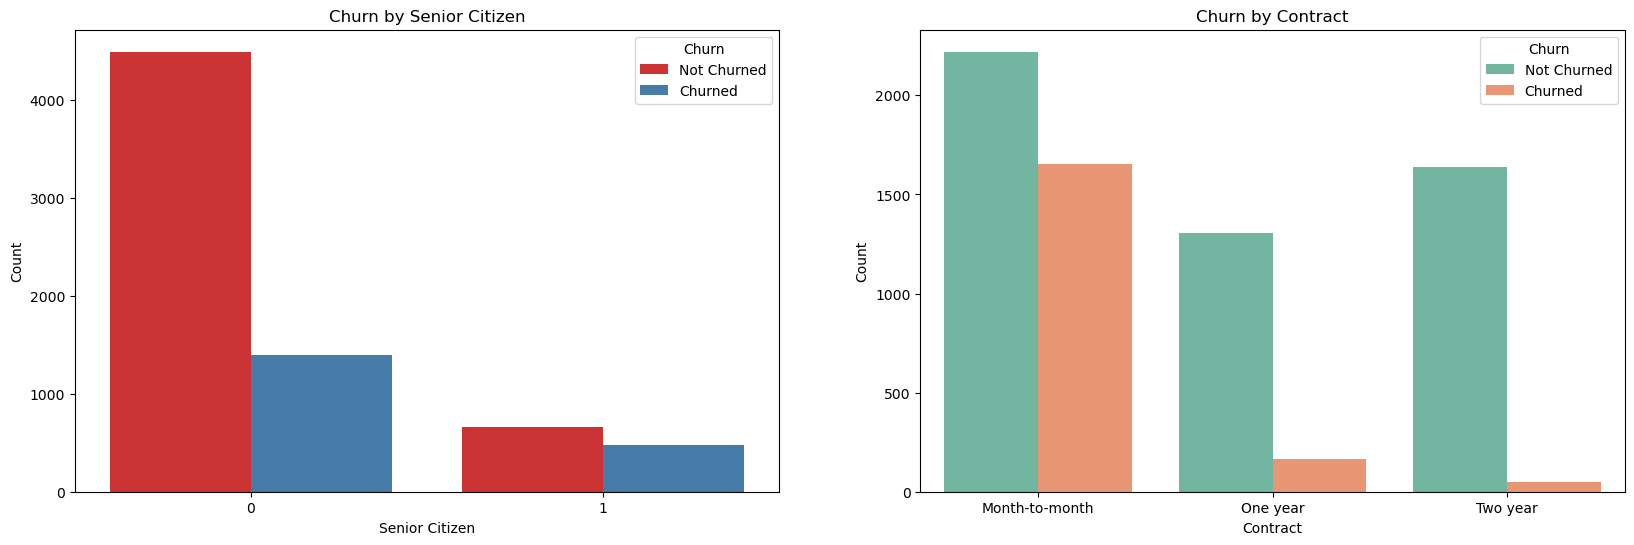

In [46]:
#Churn status of Senior citizen and contract type

# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='Set1', ax=axs[0])
axs[0].set_title('Churn by Senior Citizen')
axs[0].set_xlabel('Senior Citizen')
axs[0].set_ylabel('Count')
axs[0].legend(title='Churn', labels=['Not Churned', 'Churned'])

sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2', ax=axs[1])
axs[1].set_title('Churn by Contract')
axs[1].set_xlabel('Contract')
axs[1].set_ylabel('Count')
axs[1].legend(title='Churn', labels=['Not Churned', 'Churned'])

plt.show()

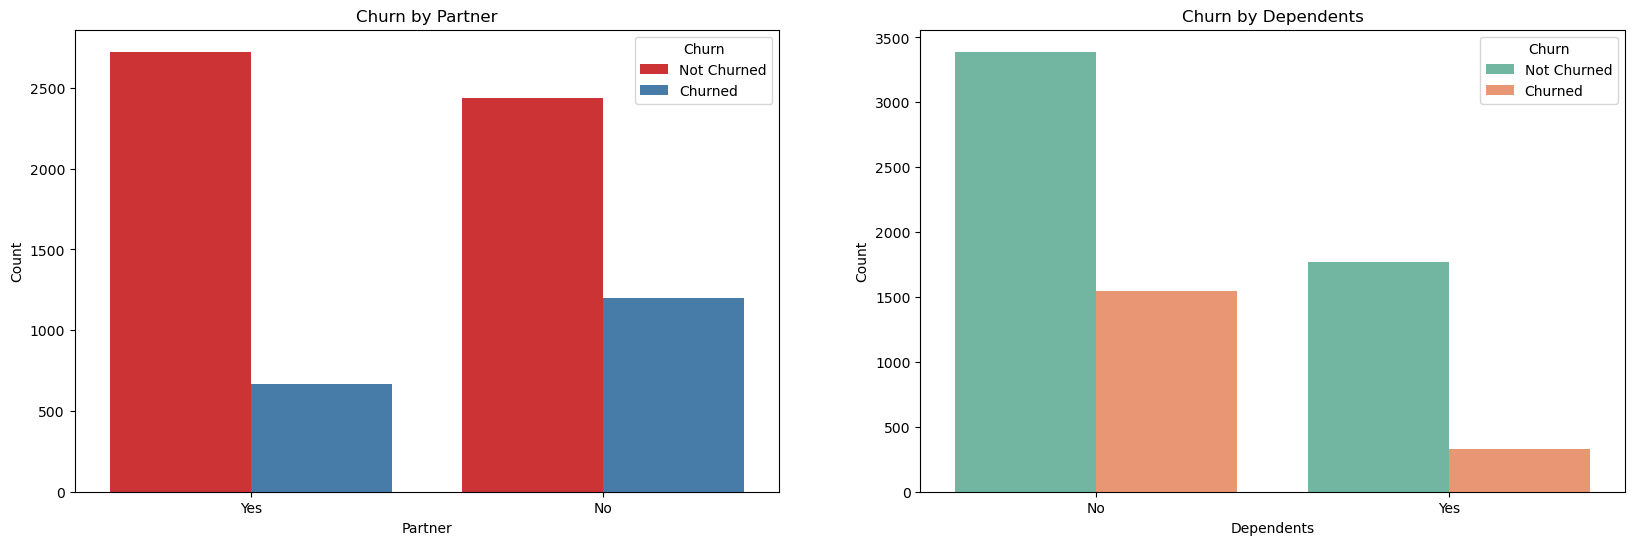

In [47]:
#too see how Partner and Dependents affect customer churn

#Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

sns.countplot(data=df, x='Partner', hue='Churn', palette='Set1', ax=axs[0])
axs[0].set_title('Churn by Partner')
axs[0].set_xlabel('Partner')
axs[0].set_ylabel('Count')
axs[0].legend(title='Churn', labels=['Not Churned', 'Churned'])

sns.countplot(data=df, x='Dependents', hue='Churn', palette='Set2', ax=axs[1])
axs[1].set_title('Churn by Dependents')
axs[1].set_xlabel('Dependents')
axs[1].set_ylabel('Count')
axs[1].legend(title='Churn', labels=['Not Churned', 'Churned'])

plt.show()

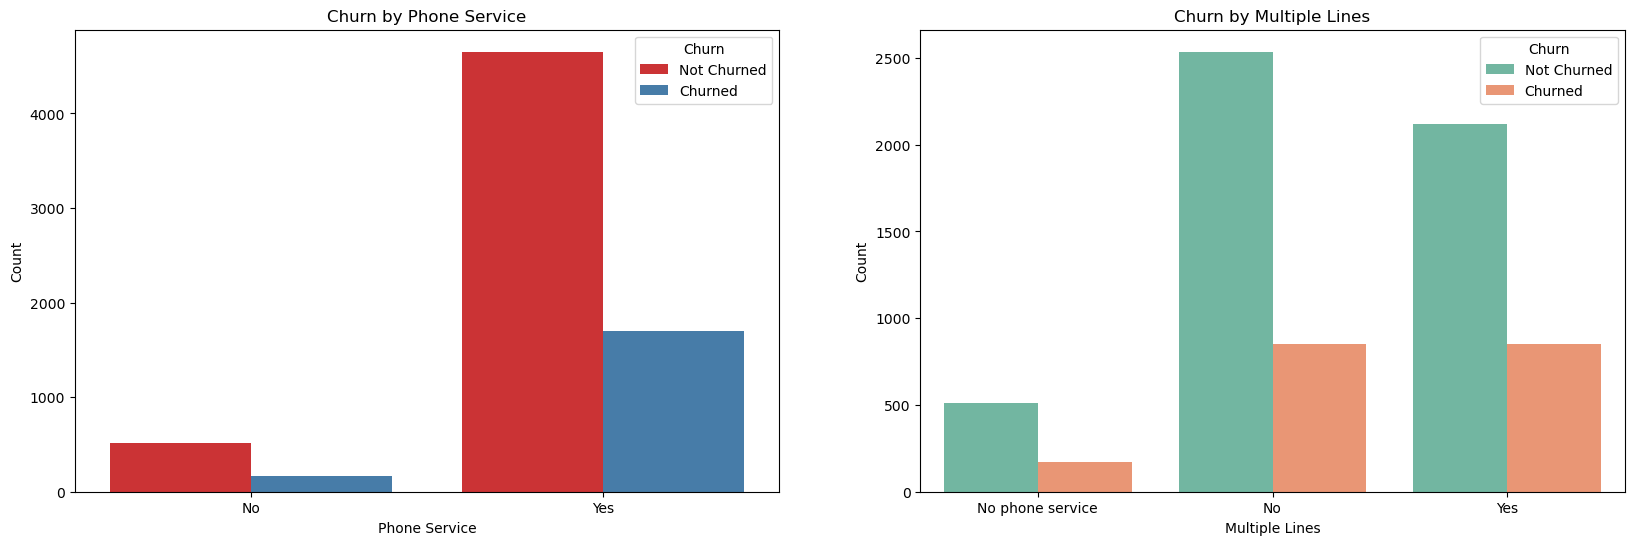

In [48]:
#Churn status of Phone service and Multiple lines

# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

sns.countplot(data=df, x='PhoneService', hue='Churn', palette='Set1', ax=axs[0])
axs[0].set_title('Churn by Phone Service')
axs[0].set_xlabel('Phone Service')
axs[0].set_ylabel('Count')
axs[0].legend(title='Churn', labels=['Not Churned', 'Churned'])

sns.countplot(data=df, x='MultipleLines', hue='Churn', palette='Set2', ax=axs[1])
axs[1].set_title('Churn by Multiple Lines')
axs[1].set_xlabel('Multiple Lines')
axs[1].set_ylabel('Count')
axs[1].legend(title='Churn', labels=['Not Churned', 'Churned'])

plt.show()

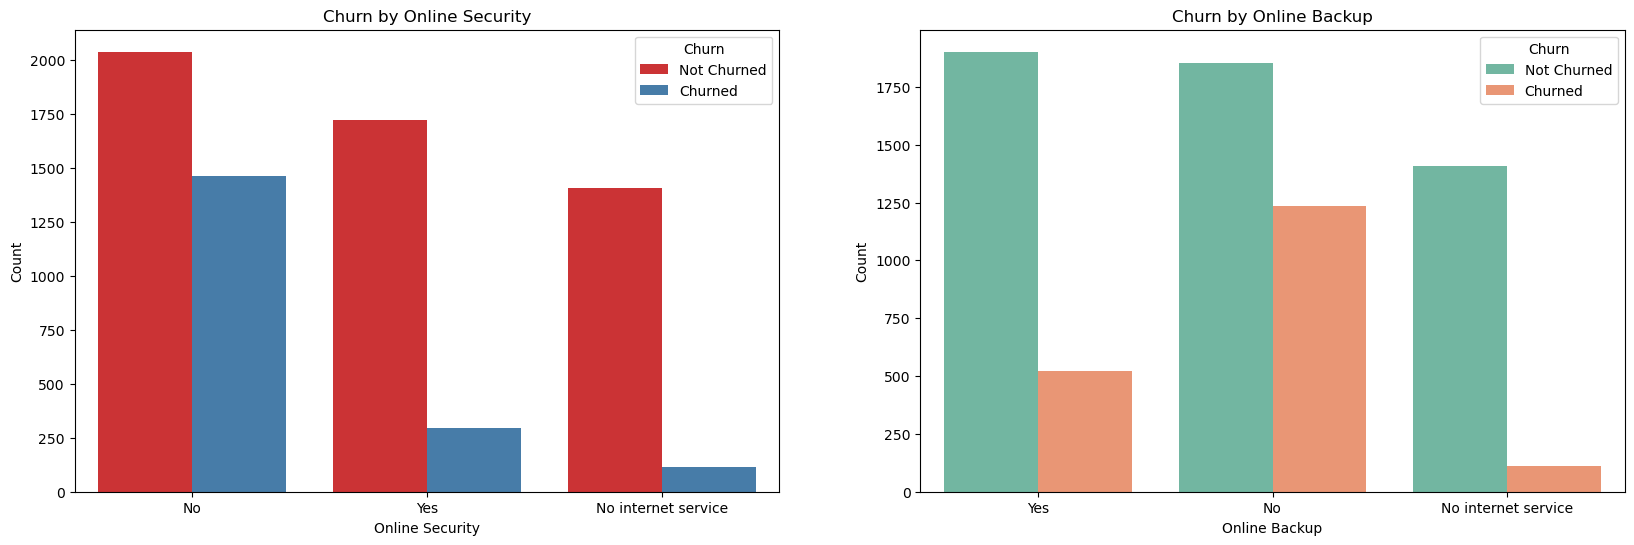

In [49]:
#Churn status of Online security and backup

# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

sns.countplot(data=df, x='OnlineSecurity', hue='Churn', palette='Set1', ax=axs[0])
axs[0].set_title('Churn by Online Security')
axs[0].set_xlabel('Online Security')
axs[0].set_ylabel('Count')
axs[0].legend(title='Churn', labels=['Not Churned', 'Churned'])

sns.countplot(data=df, x='OnlineBackup', hue='Churn', palette='Set2', ax=axs[1])
axs[1].set_title('Churn by Online Backup')
axs[1].set_xlabel('Online Backup')
axs[1].set_ylabel('Count')
axs[1].legend(title='Churn', labels=['Not Churned', 'Churned'])

plt.show()

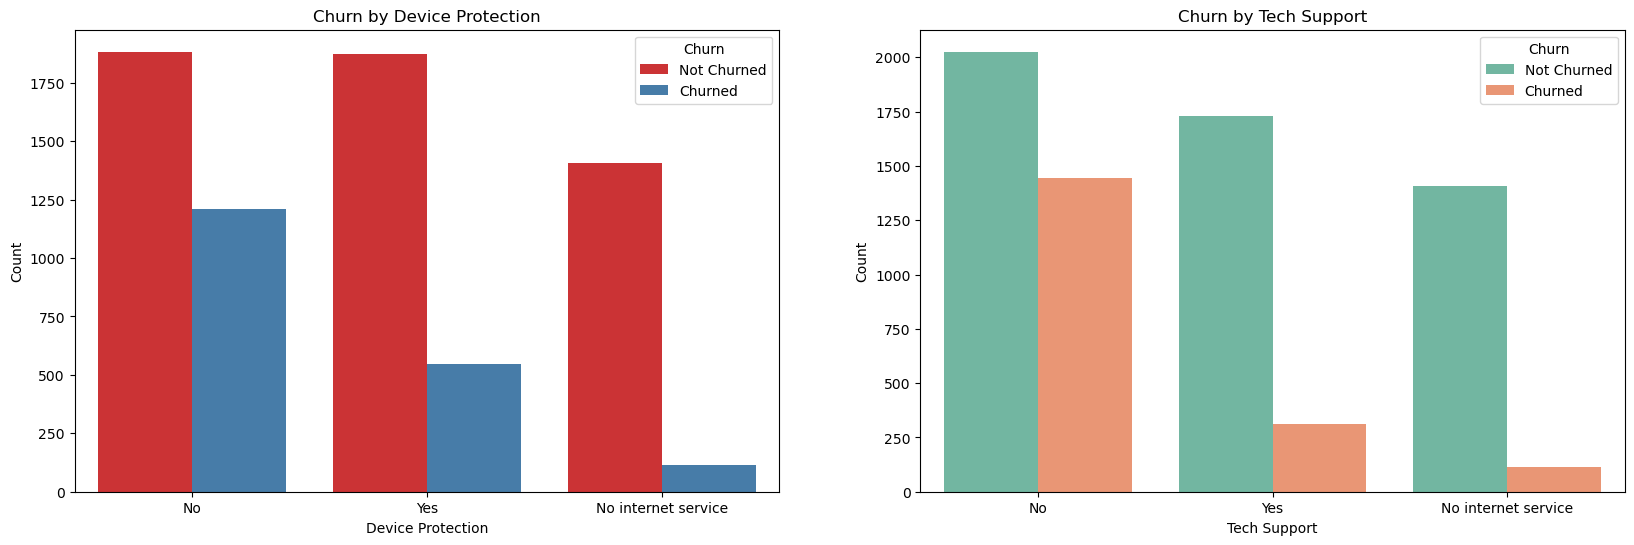

In [50]:
#Churn status of Device protection and Tech support

# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

sns.countplot(data=df, x='DeviceProtection', hue='Churn', palette='Set1', ax=axs[0])
axs[0].set_title('Churn by Device Protection')
axs[0].set_xlabel('Device Protection')
axs[0].set_ylabel('Count')
axs[0].legend(title='Churn', labels=['Not Churned', 'Churned'])

sns.countplot(data=df, x='TechSupport', hue='Churn', palette='Set2', ax=axs[1])
axs[1].set_title('Churn by Tech Support')
axs[1].set_xlabel('Tech Support')
axs[1].set_ylabel('Count')
axs[1].legend(title='Churn', labels=['Not Churned', 'Churned'])

plt.show()

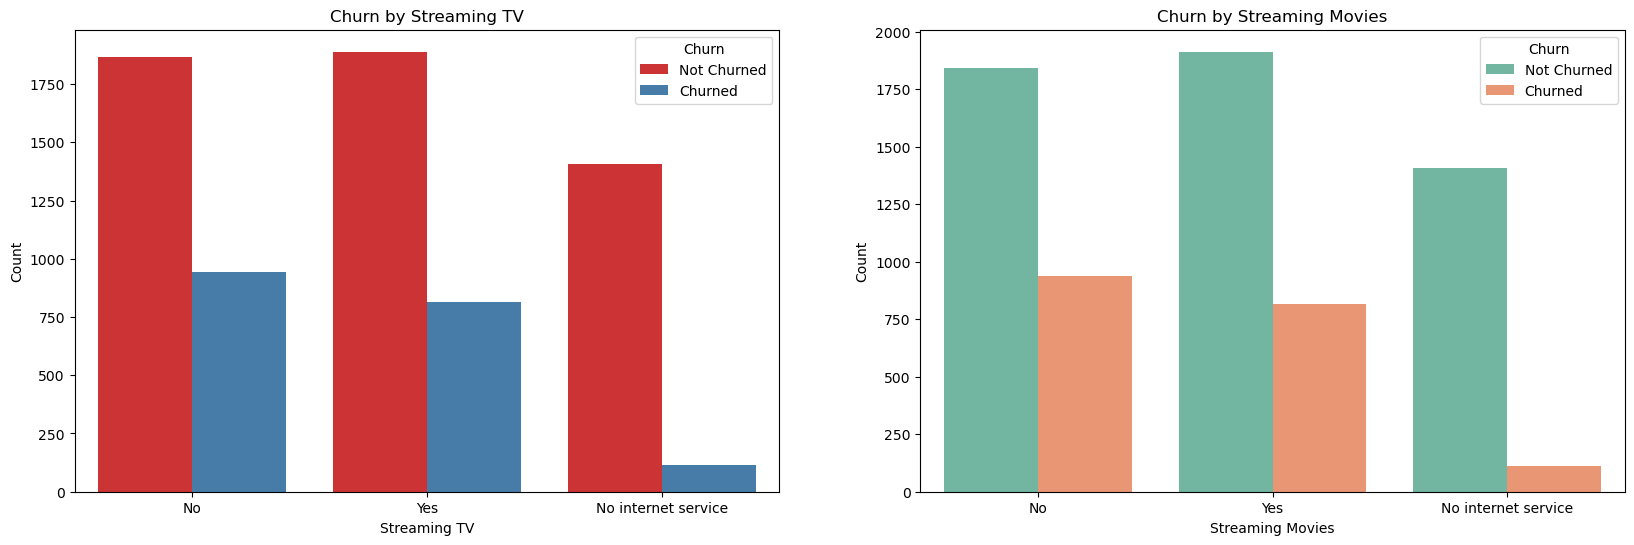

In [51]:
#Churn status of Streaming TV and Movies

# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

sns.countplot(data=df, x='StreamingTV', hue='Churn', palette='Set1', ax=axs[0])
axs[0].set_title('Churn by Streaming TV')
axs[0].set_xlabel('Streaming TV')
axs[0].set_ylabel('Count')
axs[0].legend(title='Churn', labels=['Not Churned', 'Churned'])

sns.countplot(data=df, x='StreamingMovies', hue='Churn', palette='Set2', ax=axs[1])
axs[1].set_title('Churn by Streaming Movies')
axs[1].set_xlabel('Streaming Movies')
axs[1].set_ylabel('Count')
axs[1].legend(title='Churn', labels=['Not Churned', 'Churned'])

plt.show()

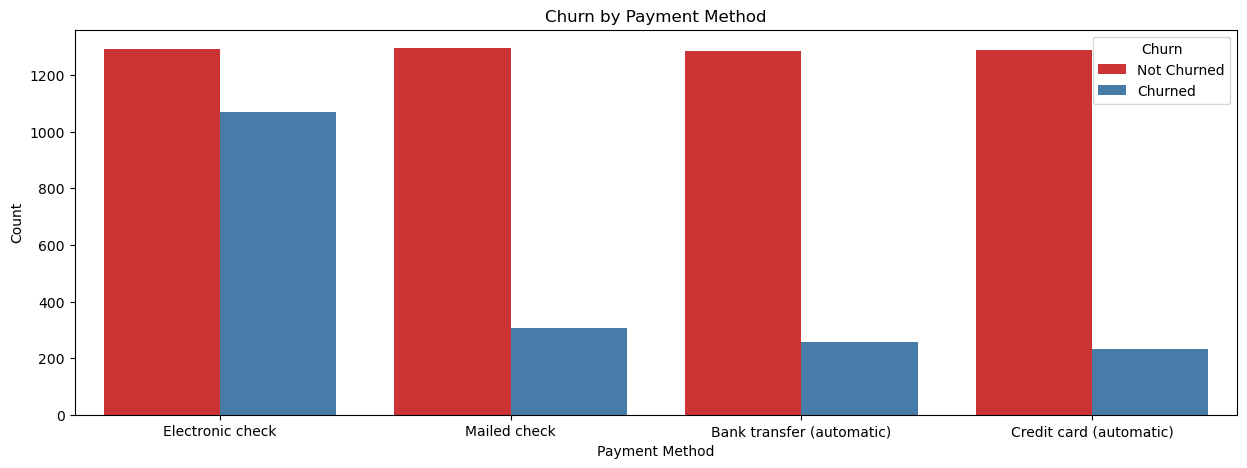

In [52]:
#Churn status of Payment method

plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Set1')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Show the plot
plt.show()

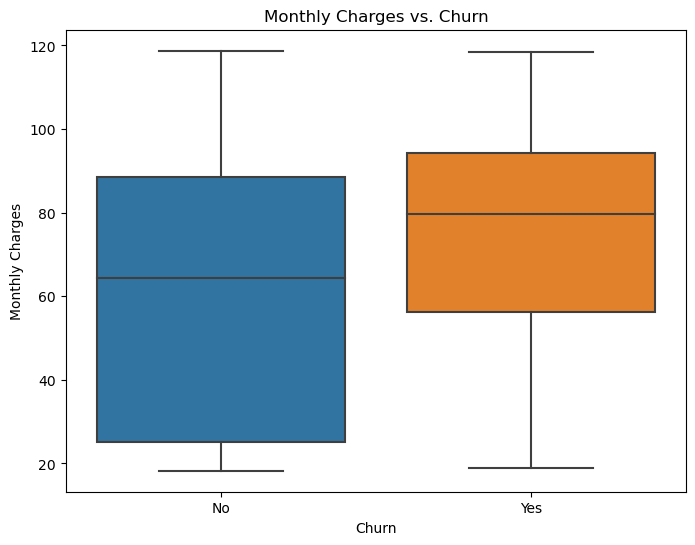

In [53]:
#Churn status of Monthly Charges

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


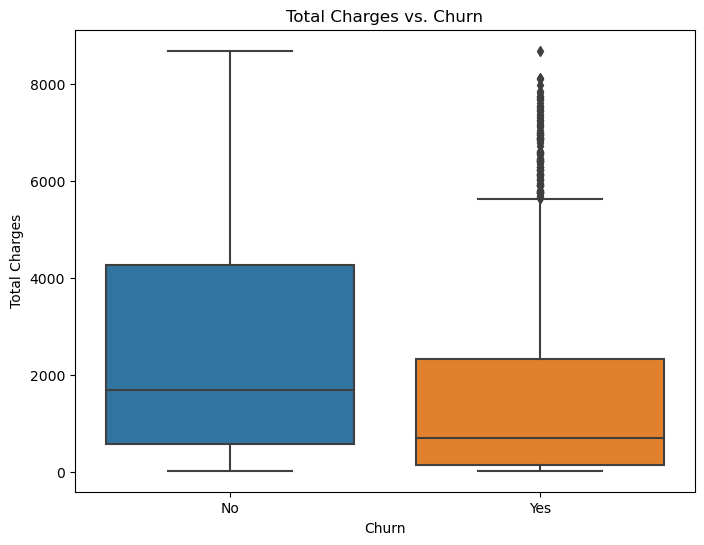

In [54]:
#Churn status of Total charges

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title('Total Charges vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()

In [55]:
#Analyze for outliers
column_name = 'TotalCharges'  # Change this to the column you're interested in

# Calculate the IQR for the specified column
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in the column
outliers_count = len(df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)])

# Print the number of outliers
print(f"Number of outliers in '{column_name}': {outliers_count}")


Number of outliers in 'TotalCharges': 0


In [56]:
#confirm that the datatype of TotalCharges is float
df['TotalCharges'].dtype

dtype('float64')

Multivariate

<Axes: >

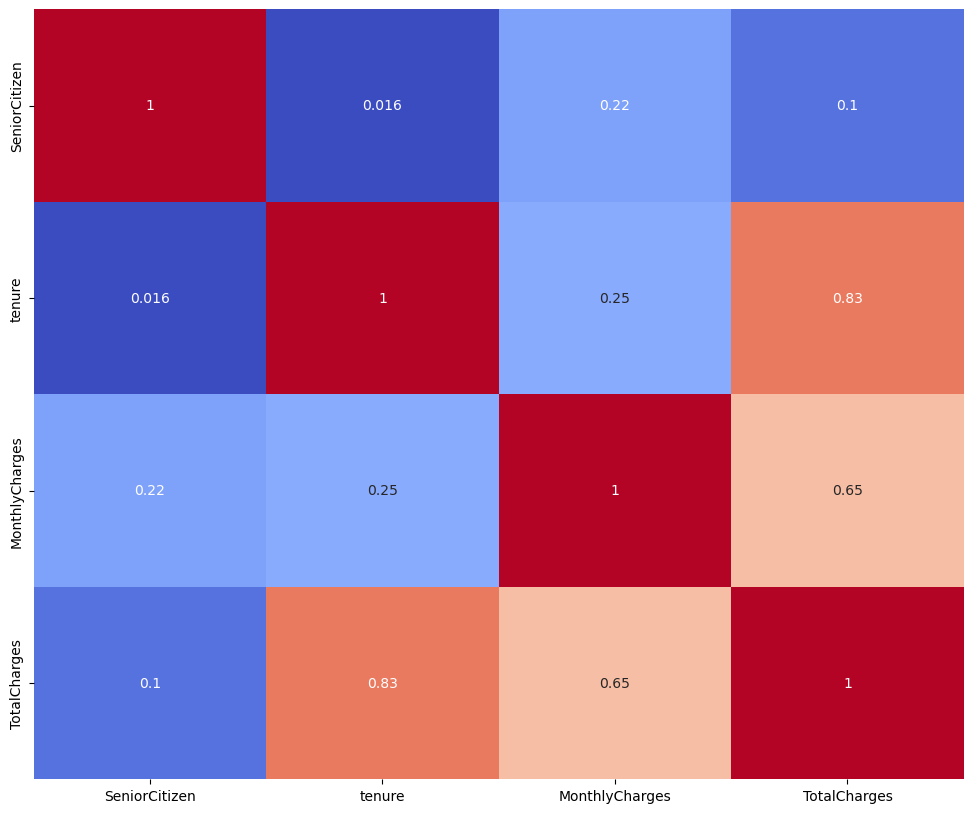

In [57]:
#check how some of the variables crrelate
plt.figure(figsize=(12,10))

corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, cbar=False)

### Feature scaling

In [58]:
#Converting categorical data to numerical using "get dummies"

In [59]:
#dropping customerID column
df.drop('customerID', axis=1, inplace=True)

In [60]:
#confirming that customerID is dropped
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [61]:
#import the LabelEncoder 
from sklearn.preprocessing import LabelEncoder

In [62]:
#create an instance of labelencoder()
label_en = LabelEncoder()

#convert churn column into numerical values
df['Churn'] = label_en.fit_transform(df['Churn'])

In [63]:
#confirming that Churn is encoded successfully
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [64]:
#select the categorical independent variables into cCols
cCols = df.select_dtypes(include=['object']).columns.tolist()

In [65]:
cCols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [66]:
# Perform One-Hot Encoding on cCols
df = pd.get_dummies(data=df, columns=cCols, drop_first=True)

In [67]:
#check that the encoding is done
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [68]:
#normalize the numerical columns

In [69]:
#create an array for the numerical columns
numCols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [70]:
numCols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [71]:
#import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [72]:
#create an instance of MinMaxScaler
minm = MinMaxScaler()

In [73]:
#normalizing the numerical variables
df[numCols] = minm.fit_transform(df[numCols])

In [74]:
#check that the normalization is done
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0.115423,0.001275,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,0.464789,0.385075,0.215867,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0.014085,0.354229,0.010310,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0.619718,0.239303,0.210241,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0.014085,0.521891,0.015330,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.323944,0.662189,0.227521,0,1,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,1.000000,0.845274,0.847461,0,0,1,1,1,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,0.140845,0.112935,0.037809,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
7041,1,0.042254,0.558706,0.033210,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [75]:
#Drop the label column before data spliting
x = df.drop('Churn', axis=1)  # Features
y = df['Churn']      #label

In [76]:
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0.115423,0.001275,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0.464789,0.385075,0.215867,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0.014085,0.354229,0.010310,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0.619718,0.239303,0.210241,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0.014085,0.521891,0.015330,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.323944,0.662189,0.227521,1,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,0,1.000000,0.845274,0.847461,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7040,0,0.140845,0.112935,0.037809,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,0.042254,0.558706,0.033210,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [77]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

### Data Splitting

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [80]:
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6030,0,0.591549,0.306468,0.237411,0,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
3410,0,0.028169,0.349751,0.019605,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
5483,0,0.760563,0.592040,0.512272,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
5524,0,0.619718,0.362189,0.292511,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6337,0,0.760563,0.822388,0.626564,0,1,1,1,0,1,...,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,0,0.028169,0.319900,0.013668,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5199,0,0.704225,0.927861,0.655949,0,0,0,1,0,1,...,0,1,0,1,1,0,1,0,1,0
5235,0,0.112676,0.625871,0.088351,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
5399,0,0.690141,0.014925,0.111961,0,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0


In [81]:
df.isna().sum().sum()

0

In [82]:
y_train

6030    1
3410    1
5483    1
5524    0
6337    0
       ..
3778    0
5199    0
5235    0
5399    0
862     1
Name: Churn, Length: 5625, dtype: int32

### Building Models

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


#import metrics to evaluate performance
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Logistic Regression

In [84]:
#create an instance of LogisticRegression model
lr = LogisticRegression()

In [85]:
#train the model
lr.fit(X_train, y_train)

LogisticRegression()

In [86]:
#predict
ylr_predict =lr.predict(X_test)

In [87]:
ylr_predict

array([0, 0, 1, ..., 0, 0, 0])

In [88]:
#check for model performance
print(classification_report(y_test, ylr_predict,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [89]:
#confusion matrix for logistic regression
print("Confusion Matrix:")
confmat = confusion_matrix(y_test, ylr_predict)
print(confmat)

Confusion Matrix:
[[917 116]
 [182 192]]


### Random Forest

In [90]:
#Creating an instance of Random Forest
rf = RandomForestClassifier()

In [91]:
#train the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [92]:
#predict
rf_predict =rf.predict(X_test)

In [93]:
rf_predict

array([0, 0, 1, ..., 0, 0, 0])

In [94]:
#check for model performance
print(classification_report(y_test, rf_predict,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [95]:
#confusion matrix for random forest
print("Confusion Matrix:")
confmat = confusion_matrix(y_test, rf_predict)
print(confmat)

Confusion Matrix:
[[932 101]
 [197 177]]


### Gradient Boosting

In [96]:
#Creating an instance of Gradient Boosting Classifier
gb = GradientBoostingClassifier()

In [97]:
#train the model
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [98]:
#predict
gb_predict =gb.predict(X_test)

In [99]:
gb_predict

array([0, 0, 1, ..., 0, 0, 0])

In [100]:
#check for model performance
print(classification_report(y_test, gb_predict,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [101]:
#confusion matrix for gradient boosting
print("Confusion Matrix:")
confmat = confusion_matrix(y_test, gb_predict)
print(confmat)

Confusion Matrix:
[[931 102]
 [195 179]]


### Balancing the datasets

In [102]:
pip install --upgrade scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [103]:
#import SMOTE library
from imblearn.combine import SMOTEENN

In [104]:
#apply the SMOTEENN technique to oversample the minority class data 
smt = SMOTEENN()

x_resampled, y_resampled = smt.fit_resample(x, y)

xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size=0.2)


In [105]:
#train and evaluate with algorithm

In [106]:
#Logistic Regression

In [107]:
#create instance of Logistic Regression
lr_smt = LogisticRegression()

In [108]:
#train the model
lr_smt.fit(xr_train, yr_train)

LogisticRegression()

In [109]:
#predict
ylr_smt_predict = lr_smt.predict(xr_test)


In [110]:
#print report
print("Classification Report:")
print(classification_report(yr_test, ylr_smt_predict))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       564
           1       0.92      0.94      0.93       665

    accuracy                           0.92      1229
   macro avg       0.92      0.92      0.92      1229
weighted avg       0.92      0.92      0.92      1229



In [111]:
print("Confusion Matrix:")
confmat = confusion_matrix(yr_test, ylr_smt_predict)
print(confmat)


Confusion Matrix:
[[507  57]
 [ 42 623]]


In [112]:
#Random Forest

In [113]:
#create an instance of Random Forest
rf_smt = RandomForestClassifier()

In [114]:
#train the model on the balanced datasets
rf_smt.fit(xr_train, yr_train)

RandomForestClassifier()

In [115]:
#predict
yrf_smt_predict = rf_smt.predict(xr_test)

In [116]:
#print report
print("Classification Report:")
print(classification_report(yr_test, yrf_smt_predict))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       564
           1       0.95      0.98      0.97       665

    accuracy                           0.96      1229
   macro avg       0.97      0.96      0.96      1229
weighted avg       0.96      0.96      0.96      1229



In [117]:
print("Confusion Matrix:")
confmat = confusion_matrix(yr_test, yrf_smt_predict)
print(confmat)


Confusion Matrix:
[[532  32]
 [ 12 653]]


In [118]:
#Gradient Boosting

In [119]:
#creating an instance of Gradient Boosting Classifier
gb_smt = GradientBoostingClassifier()

In [120]:
#train the model on the balanced datasets
gb_smt.fit(xr_train, yr_train)

GradientBoostingClassifier()

In [121]:
#predict
ygb_smt_predict = gb_smt.predict(xr_test)

In [122]:
#print report
print("Classification Report:")
print(classification_report(yr_test, ygb_smt_predict))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       564
           1       0.93      0.96      0.94       665

    accuracy                           0.94      1229
   macro avg       0.94      0.94      0.94      1229
weighted avg       0.94      0.94      0.94      1229



In [123]:
print("Confusion Matrix:")
confmat = confusion_matrix(yr_test, ygb_smt_predict)
print(confmat)

Confusion Matrix:
[[513  51]
 [ 24 641]]


### Insight and Reccommendations based on the EDA above

Based on the exploratory data analysis (EDA) of ConnectTel, several key insights and recommendations can be made:

1. Churn Rate: The overall churn rate for ConnectTel is 27%, which is a significant portion of the customer base. Addressing churn is crucial for maintaining business sustainability and growth.

2. Contract Type: Monthly contract types are more popular, with about double the number of subscribers compared to other contract types. This indicates that ConnectTel should focus on retaining these monthly subscribers, as they form a substantial portion of their customer base.

3. Gender: There is an equal distribution of male and female subscribers, suggesting that gender-based strategies may not be as effective. However, understanding gender-neutral preferences and needs is essential.

4. Phone Service: Over 90% of subscribers have phone service, but interestingly, both subscribers with and without phone service have a similar churn rate (about 40%). ConnectTel should investigate the reasons behind this and work on retention strategies for both groups.

5. Internet Service: Fiber optic technology is more popular than DSL, but it's worth noting that customers on fiber optics tend to churn more than DSL users. Understanding the reasons behind this higher churn and addressing them is crucial.

6. Tech Support: About 28% of subscribers use tech support services, and they tend to churn less than those without tech support. This indicates that providing reliable tech support can help reduce churn.

7. Contract Length: Subscribers with longer contract durations have lower churn rates. ConnectTel should encourage longer-term contracts as they contribute to higher customer loyalty.

8. Partners and Dependents: Subscribers without partners tend to churn more than those with partners. On the other hand, subscribers with dependents churn less than those without. Targeted retention strategies can be designed based on these demographics.

9. Payment Method: Customers using electronic checks have a higher churn rate compared to those using other payment methods like mail checks, auto bank transfers, and auto credit cards. ConnectTel should explore the reasons behind this and possibly incentivize other payment methods.

10. Monthly and Total Charges: Customers with higher monthly charges and total charges tend to churn more. This suggests that there might be dissatisfaction related to pricing or service quality among these customers. ConnectTel should consider pricing strategies and service improvements.

11. Tenure and Total Charges: Tenure positively correlates with total charges, indicating that long-term customers tend to spend more. This can be leveraged for customer retention and upselling opportunities.

Overall, ConnectTel should focus on addressing the specific pain points identified in the EDA to reduce churn, enhance customer loyalty, and maintain a competitive edge in the telecommunications industry. This can be achieved through targeted retention initiatives, improved customer support, and pricing strategies. Additionally, understanding the reasons behind higher churn in certain segments, such as fiber optic users and electronic check payers, is essential for implementing effective solutions.


### Performance of the ML Models and Recommendation

All three machine learning models (Logistic Regression, Random Forest, and Gradient Boosting) exhibit strong predictive performance in identifying customer churn for ConnectTel Telecommunications. The Random Forest model did best with the metrics used in the evaluation.
Based on the confusion matrix Random Forest model has the highest true positive and the least false negative, thus confirming its reliability. Hence, Random Forest should be considered the model of first choice.